### **Classification of handwritten numbers in the range of 0-9 using Convolutional Neural Networks**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#split and load the data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
#one hot encoding
Y_test_one_hot=to_categorical(Y_test)
Y_train_one_hot=to_categorical(Y_train)

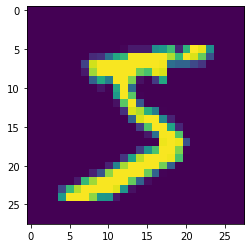

In [ ]:
plt.imshow(X_train[0])

In [ ]:
#image reshape
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
#Build the model
model=Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
hist=model.fit(X_train,Y_train_one_hot, validation_data=(X_test,Y_test_one_hot),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 224s 119ms/step - loss: 0.5419 - accuracy: 0.9176 - val_loss: 0.0675 - val_accuracy: 0.9787
Epoch 2/3
1875/1875 [==============================] - 223s 119ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0707 - val_accuracy: 0.9791
Epoch 3/3
1875/1875 [==============================] - 223s 119ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0607 - val_accuracy: 0.9827


In [ ]:
print(hist.history)

{'loss': [0.1840585470199585, 0.06245693936944008, 0.04429140314459801], 'accuracy': [0.9567833542823792, 0.9809666872024536, 0.9862666726112366], 'val_loss': [0.0675261914730072, 0.07067415863275528, 0.06070375815033913], 'val_accuracy': [0.9786999821662903, 0.9790999889373779, 0.982699990272522]}


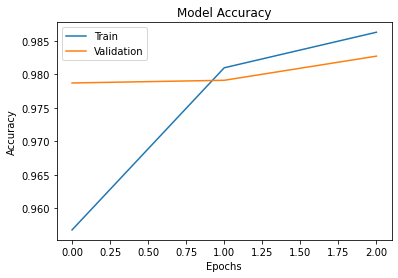

In [ ]:
#plot the accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
predictions=model.predict(X_test[:4])

In [ ]:
print(np.argmax(predictions,axis=1))
Y_test[:4]

[7 2 1 0]


array([7, 2, 1, 0], dtype=uint8)

(28, 28, 1)


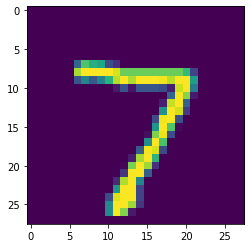

(28, 28, 1)


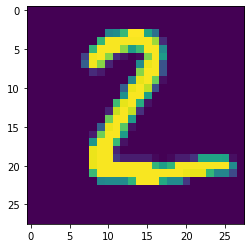

(28, 28, 1)


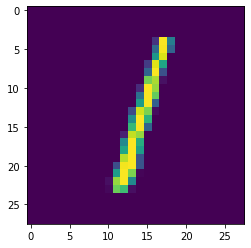

(28, 28, 1)


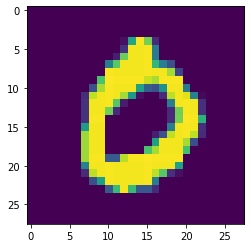

In [ ]:
for i in range (0,4):
  image=X_test[i]
  image=np.array(image, dtype="float")
  print(image.shape)
  pixels=image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()

In [ ]:
print(hist.history['accuracy'][2])